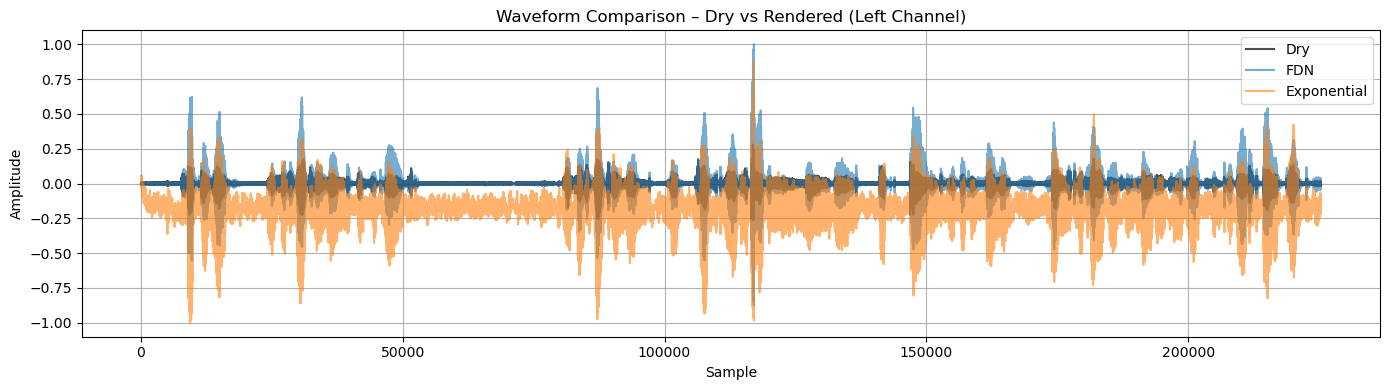

In [7]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load dry and rendered stereo files
dry_audio, _ = sf.read('') # Dry Audio Folder Path
fdn_audio, _ = sf.read('') # Rendered FDN Samples Folder Path
exp_audio, _ = sf.read('') # Exponentially Rendered Sampels Fodler Path

# Use left channels (dry is mono, so no channel index)
dry_left = dry_audio
fdn_left = fdn_audio[:, 0]
exp_left = exp_audio[:, 0]

# Plot comparison
plt.figure(figsize=(14, 4))
plt.plot(dry_left, alpha=0.7, label="Dry", color='black')
plt.plot(fdn_left, alpha=0.6, label="FDN")
plt.plot(exp_left, alpha=0.6, label="Exponential")
plt.title("Waveform Comparison – Dry vs Rendered (Left Channel)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

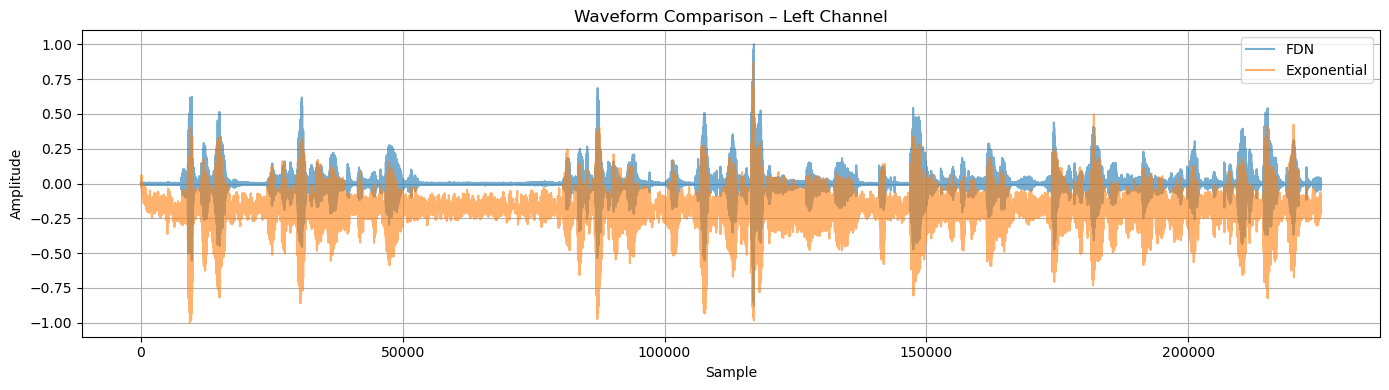

In [5]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load both rendered stereo files
fdn_audio, _ = sf.read('') #FDN Sample Path
exp_audio, _ = sf.read('') #Exponential Sample Path

# Use left channels
fdn_left = fdn_audio[:, 0]
exp_left = exp_audio[:, 0]

# Plot comparison
plt.figure(figsize=(14, 4))
plt.plot(fdn_left, alpha=0.6, label="FDN")
plt.plot(exp_left, alpha=0.6, label="Exponential")
plt.title("Waveform Comparison – Left Channel")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

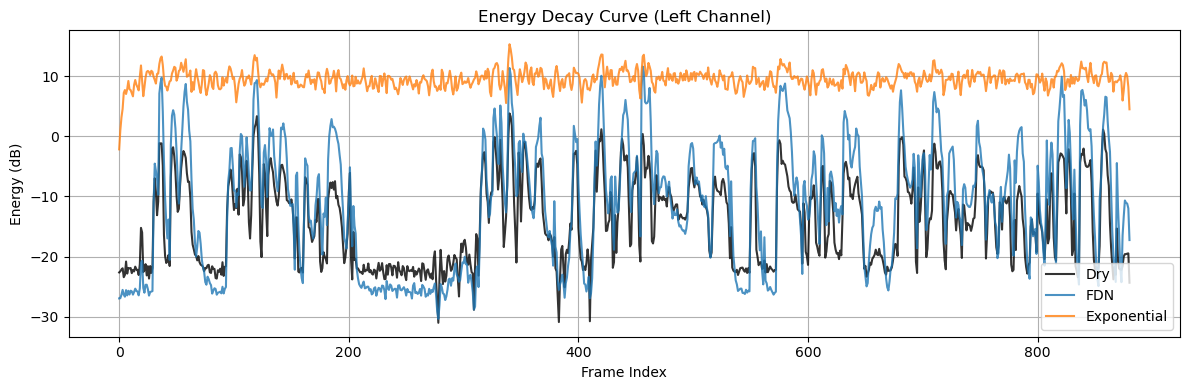

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute energy decay in dB
def compute_energy_decay(signal, frame_size=256):
    energy = [
        np.sum(signal[i:i+frame_size]**2)
        for i in range(0, len(signal), frame_size)
    ]
    return 10 * np.log10(np.maximum(energy, 1e-10))  # convert to dB safely

# Compute decay curves
dry_decay = compute_energy_decay(dry_left)
fdn_decay = compute_energy_decay(fdn_left)
exp_decay = compute_energy_decay(exp_left)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(dry_decay, label="Dry", color='black', alpha=0.8)
plt.plot(fdn_decay, label="FDN", alpha=0.8)
plt.plot(exp_decay, label="Exponential", alpha=0.8)
plt.title("Energy Decay Curve (Left Channel)")
plt.xlabel("Frame Index")
plt.ylabel("Energy (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

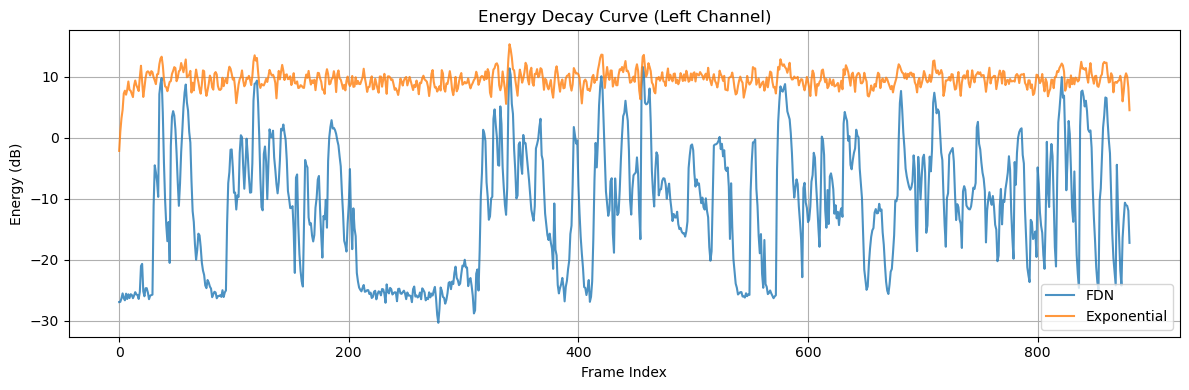

In [5]:
# Define a function to compute energy per frame
def compute_energy_decay(signal, frame_size=256):
    energy = [
        np.sum(signal[i:i+frame_size]**2)
        for i in range(0, len(signal), frame_size)
    ]
    return 10 * np.log10(np.maximum(energy, 1e-10))  # convert to dB

# Compute decay curves
fdn_decay = compute_energy_decay(fdn_left)
exp_decay = compute_energy_decay(exp_left)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(fdn_decay, label="FDN", alpha=0.8)
plt.plot(exp_decay, label="Exponential", alpha=0.8)
plt.title("Energy Decay Curve (Left Channel)")
plt.xlabel("Frame Index")
plt.ylabel("Energy (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()